<img src="mmu_logo.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- programm in linear regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 500)

In [2]:
import os
os.listdir()

['python.png',
 'tma7021.png',
 '.ipynb_checkpoints',
 'LinearRegression.ipynb',
 'data']

In [4]:
df_all = pd.DataFrame()
for i in range(4):
    filename = './data/file' + str(i+1) + ".xlsx"
    df = pd.read_excel(filename, sheet_name='Reading', skiprows = 2, usecols = 'G:AB') 
    df.drop(df.index[31:], inplace=True)
    df_all = df_all.append(df) 
df_all = df_all.fillna(0)
df_all = df_all/56*5
df_all = df_all.round(2)
df_all.head()

,Detergent 1,Detergent 2,Detergent 3,Detergent 4,Softener 1,Softener 2,Bleach 1,Bleach 2,Aroma 1,Aroma 2,Bag 1,Bag 2,W1,W2,W3,W4,W5,W6,D7,D8,D9,D10
0,1.70,1.70,1.52,1.61,1.07,1.07,2.23,2.23,1.96,1.96,1.70,1.79,18.12,33.39,67.77,49.02,41.52,33.84,56.16,30.36,25.80,46.07
1,1.61,1.52,1.25,1.25,0.89,0.89,2.14,2.14,1.88,1.96,1.61,1.70,6.07,7.14,37.95,42.59,24.82,38.04,28.30,4.55,19.73,23.30
2,1.61,1.52,1.07,1.16,0.89,0.89,2.05,2.05,1.88,1.96,1.52,1.61,10.18,20.27,39.55,28.39,19.73,35.89,4.55,13.66,18.75,14.73
3,1.61,1.52,1.07,1.16,0.80,0.80,1.88,1.96,1.79,1.88,1.52,1.52,7.14,21.25,19.73,48.12,35.98,36.52,22.77,19.20,18.21,23.75
4,2.32,2.23,1.70,1.61,1.43,1.52,1.79,1.88,1.70,1.70,1.34,1.34,12.68,38.93,38.48,46.07,33.93,58.75,36.43,25.27,24.38,41.52


In [13]:
df_all_melt = df_all.melt()
df_all_melt.columns = ['Item', 'Sales']
a=df_all_melt.loc[df_all_melt['Item']=='Detergent 1','Sales']
df_all_melt['Sales'].sum()

62845.22

Text(0.5, 0, 'Items')

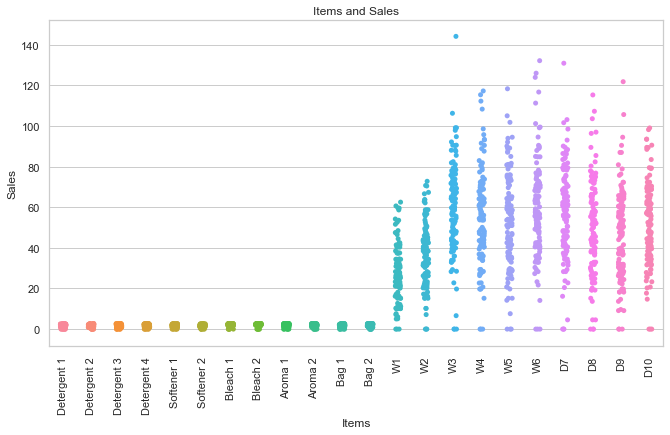

In [14]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

a = sns.stripplot(x="Item", y="Sales", 
    data=df_all_melt)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('Items and Sales')
a.set_ylabel('Sales')
a.set_xlabel('Items')


Text(0.5, 0, 'Items')

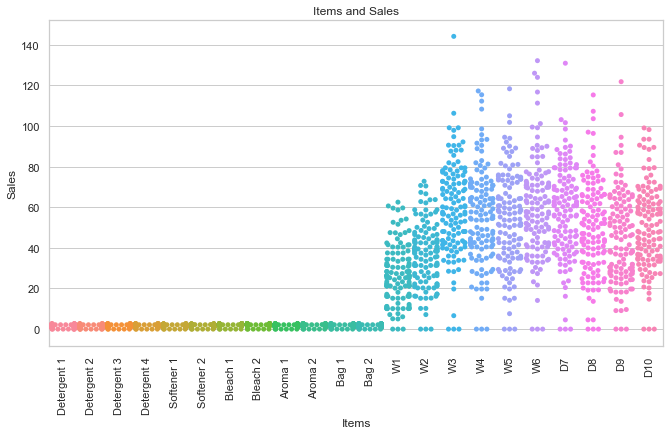

In [15]:
sns.set(rc={'figure.figsize':(11, 6)})
sns.set(style="whitegrid", color_codes=True)

a = sns.swarmplot(x="Item", y="Sales", data=df_all_melt)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('Items and Sales')
a.set_ylabel('Sales')
a.set_xlabel('Items')


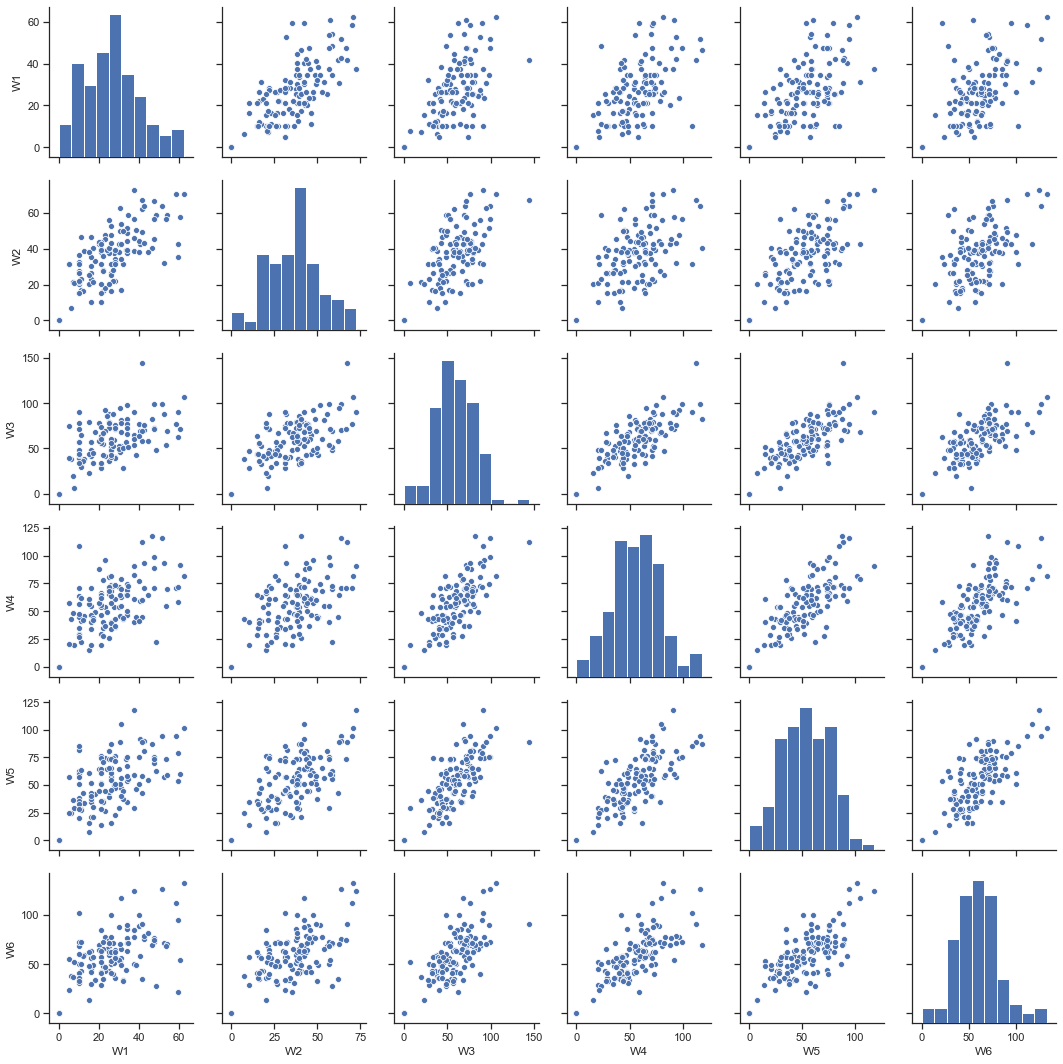

In [16]:
sns.set_style("ticks")
sns.pairplot(df_all.loc[:,['W1','W2','W3','W4','W5','W6']])


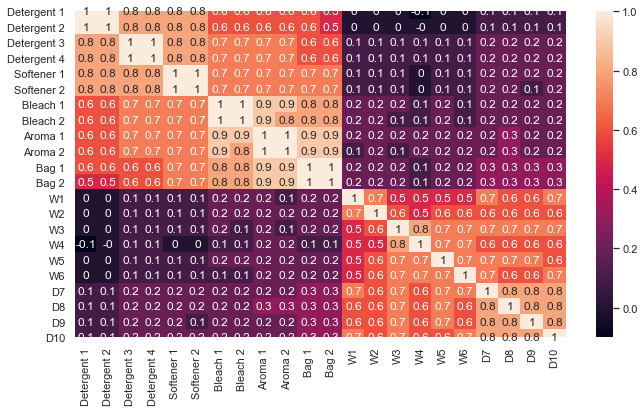

In [17]:
sns.set(rc={'figure.figsize':(11,6)})

correlation_matrix = df_all.iloc[:,:].corr().round(1)

sns.heatmap(data=correlation_matrix, annot=True)


In [20]:
df_itemSales = df_all_melt.groupby(["Item"]).sum() 
df_itemSales.reset_index(inplace=True)
df_itemSales.head()

,Item,Sales
0,Aroma 1,227.60
1,Aroma 2,229.58
2,Bag 1,212.99
3,Bag 2,212.20
4,Bleach 1,267.92


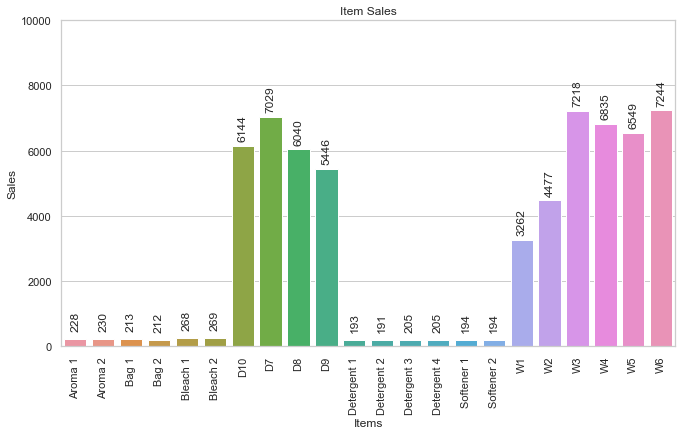

In [21]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x="Item", y="Sales",  data=df_itemSales)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Item Sales')
b.set_ylabel('Sales')
b.set_xlabel('Items')
b.set(ylim=(0, 10000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=90, 
	xytext=(0, 18), textcoords='offset points')



In [23]:
df_dailySales = df_all.groupby(df_all.index).sum() 
df_dailySales.reset_index(drop=True, inplace=True) 
df_dailySales = df_dailySales.sum(axis=1).to_frame() 
df_dailySales.columns = ['Sales'] 
df_dailySales

,Sales
0,1948.95
1,1980.99
2,1925.32
3,1958.80
4,1546.50
5,2783.05
6,1957.65
7,1595.72
8,1610.52
9,2200.55


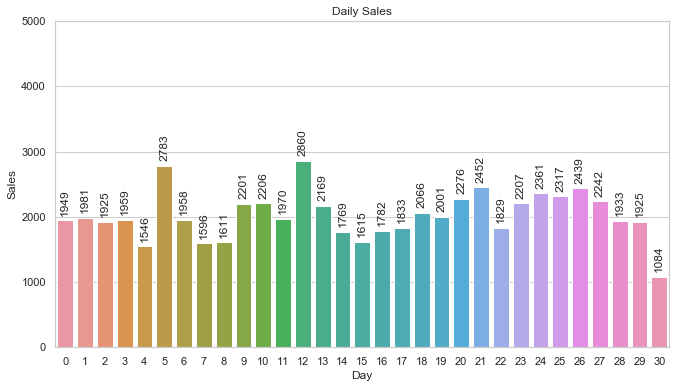

In [24]:
sns.set(rc={'figure.figsize':(11, 6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x=df_dailySales.index, y="Sales",  data=df_dailySales)
b.set_xticklabels(b.get_xticklabels(), rotation=0)
b.set_title('Daily Sales')
b.set_ylabel('Sales')
b.set_xlabel('Day')

b.set(ylim=(0, 5000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=90, 
	xytext=(0, 18), textcoords='offset points')


In [25]:
df_all['VM_Sum'] = df_all.loc[:, 'Detergent 1':'Bag 2'].sum(axis=1)
df_all.head()


,Detergent 1,Detergent 2,Detergent 3,Detergent 4,Softener 1,Softener 2,Bleach 1,Bleach 2,Aroma 1,Aroma 2,Bag 1,Bag 2,W1,W2,W3,W4,W5,W6,D7,D8,D9,D10,VM_Sum
0,1.70,1.70,1.52,1.61,1.07,1.07,2.23,2.23,1.96,1.96,1.70,1.79,18.12,33.39,67.77,49.02,41.52,33.84,56.16,30.36,25.80,46.07,20.54
1,1.61,1.52,1.25,1.25,0.89,0.89,2.14,2.14,1.88,1.96,1.61,1.70,6.07,7.14,37.95,42.59,24.82,38.04,28.30,4.55,19.73,23.30,18.84
2,1.61,1.52,1.07,1.16,0.89,0.89,2.05,2.05,1.88,1.96,1.52,1.61,10.18,20.27,39.55,28.39,19.73,35.89,4.55,13.66,18.75,14.73,18.21
3,1.61,1.52,1.07,1.16,0.80,0.80,1.88,1.96,1.79,1.88,1.52,1.52,7.14,21.25,19.73,48.12,35.98,36.52,22.77,19.20,18.21,23.75,17.51
4,2.32,2.23,1.70,1.61,1.43,1.52,1.79,1.88,1.70,1.70,1.34,1.34,12.68,38.93,38.48,46.07,33.93,58.75,36.43,25.27,24.38,41.52,20.56


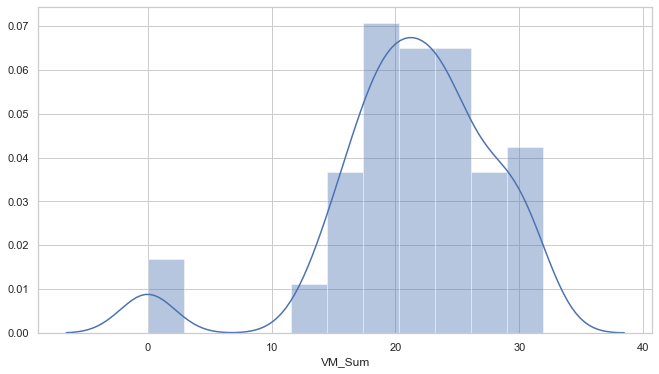

In [26]:
sns.distplot(df_all['VM_Sum'])


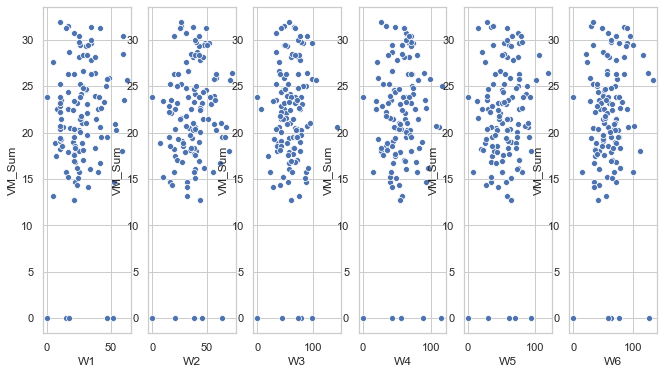

In [27]:
features = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6']
target = df_all['VM_Sum']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_all[col]
    y = target
    sns.scatterplot(x,y)


# LR using statemodels 

In [48]:
import statsmodels.api as sm
X = df_all[['W3']]
Y = df_all[['VM_Sum']]


In [49]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 VM_Sum   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              543.0
Date:                Tue, 29 Oct 2019   Prob (F-statistic):                    1.48e-46
Time:                        20:13:35   Log-Likelihood:                         -448.33
No. Observations:                 122   AIC:                                      898.7
Df Residuals:                     121   BIC:                                      901.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W3             0.3195      0.014     23.302      0.000       0.292       0.347
==============================================================================
Omnibus:                       19.735   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.245
Skew:                          -0.819   Prob(JB):                     7.36e-07
Kurtosis:                       4.695   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

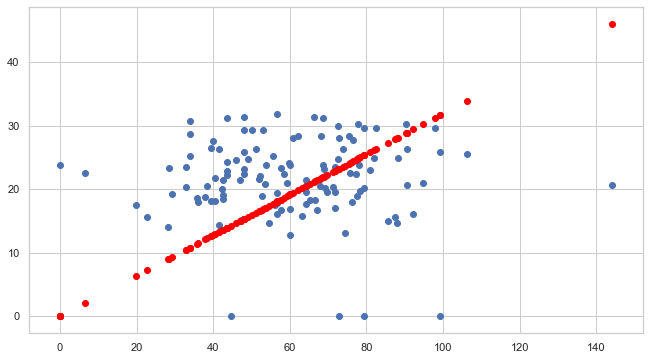

In [53]:
plt.scatter(X['W3'],Y)
plt.scatter(X['W3'],predictions, color='red')


In [54]:
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()


/Users/tingcy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VM_Sum   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.744
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.189
Time:                        20:15:03   Log-Likelihood:                -404.81
No. Observations:                 122   AIC:                             813.6
Df Residuals:                     120   BIC:                             819.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1998      1.718     11.178      0.000      15.799      22.601
W3             0.0358      0.027      1.321      0.189      -0.018       0.090
==============================================================================
Omnibus:                       35.199   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.307
Skew:                          -1.258   Prob(JB):                     6.59e-15
Kurtosis:                       5.553   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

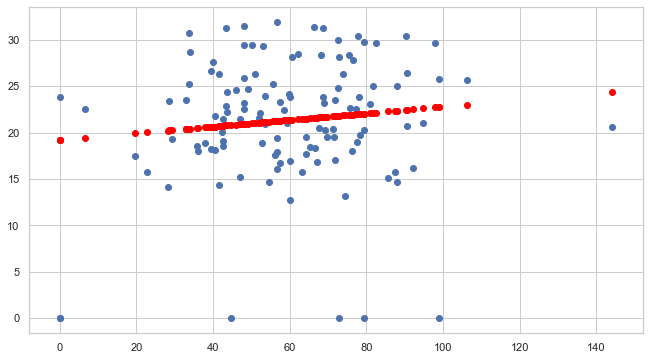

In [56]:
plt.scatter(X['W3'],Y)
plt.scatter(X['W3'],predictions, color='red')


# LR using sklearn

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [29]:
X = df_all[['W3']]
Y = df_all[['VM_Sum']]


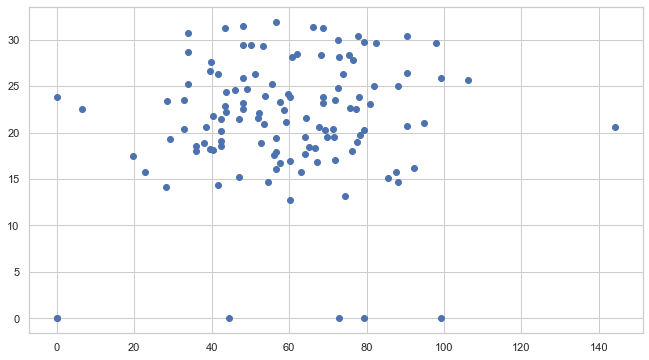

In [45]:
plt.plot(X,Y, linestyle='',marker='o')

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(97, 1)
(97, 1)
(25, 1)
(25, 1)


In [32]:
X_train

,W3
19,57.59
9,67.23
22,60.18
23,57.59
15,43.48
...,...
11,62.14
0,69.82
20,75.36
17,49.02


In [34]:
lm = LinearRegression()
lm.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lm.coef_ 

array([[0.04808985]])

In [39]:
lm.intercept_

array([18.68643099])

In [40]:
Y_test_pred = lm.predict(X_test)

Y_test_pred = pd.DataFrame(Y_test_pred, columns=['PredictedSum']) 


In [41]:
df_tmp = df_all.loc[:,['W3','VM_Sum']]

df_new = pd.concat([df_tmp.reset_index(drop=True), Y_test_pred], axis=1) 

df_new.head()


,W3,VM_Sum,PredictedSum
0,67.77,20.54,20.901930
1,37.95,18.84,22.400410
2,39.55,18.21,22.503803
3,19.73,17.51,22.181601
4,38.48,20.56,20.996667


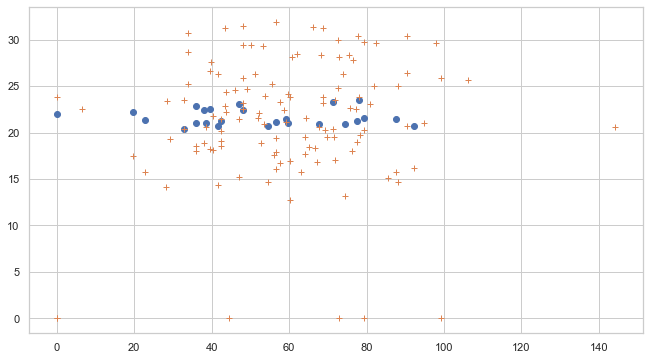

In [42]:
plt.plot( 'W3', 'PredictedSum', data=df_new, linestyle='', marker='o')  

plt.plot( 'W3', 'VM_Sum', data=df_new, linestyle='', marker='+') 


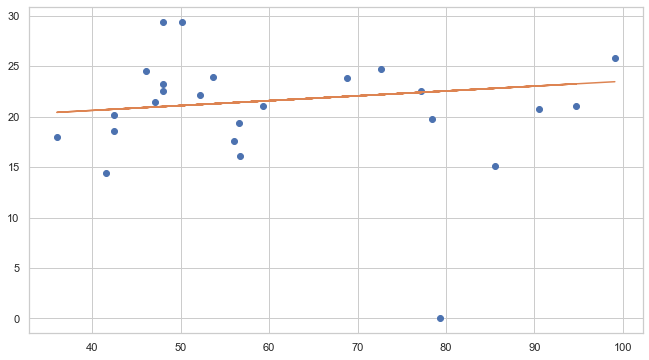

In [43]:
plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, Y_test_pred)
plt.show()
